In [4]:
import pyhrv.tools as tools
import biosppy
import numpy as np
import pyhrv.tools as tools
from opensignalsreader import OpenSignalsReader
import pandas as pd
import japanize_matplotlib


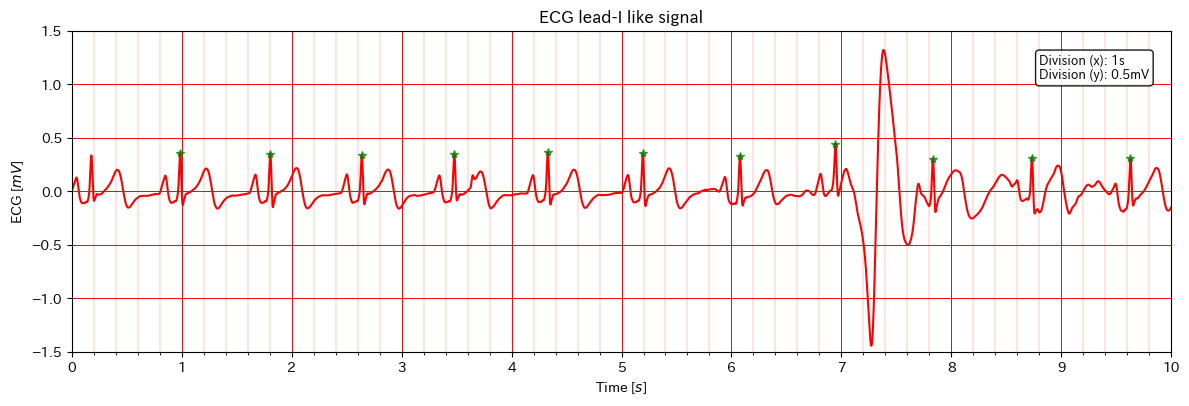

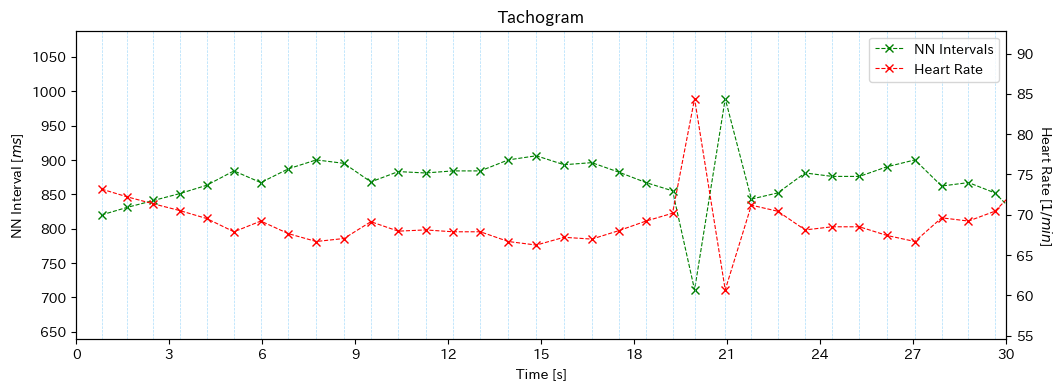

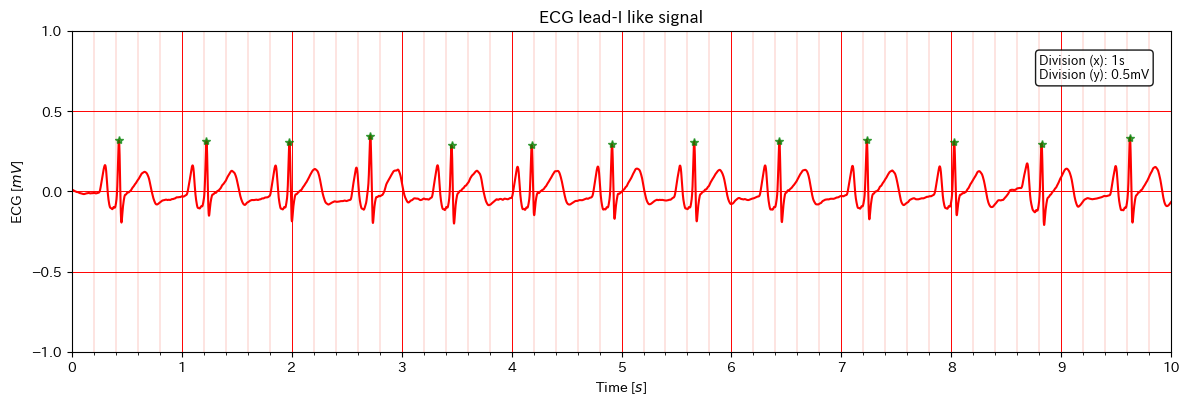

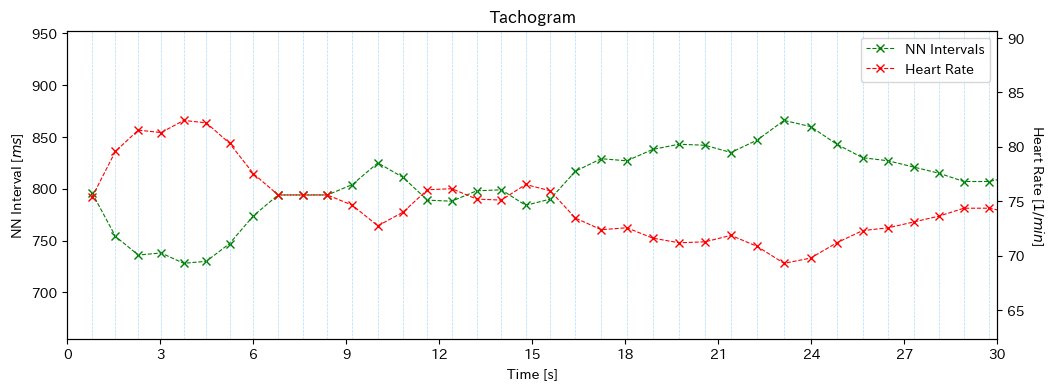

In [5]:

# Load sample ECG signal & extract R-peaks using BioSppy
def calc_nni(file):
    signal_ecg = pd.read_csv(file, skiprows=None, header=None)
    t, signal, rpeaks = biosppy.signals.ecg.ecg(signal=signal_ecg[0], sampling_rate=1000, show=False, interactive=False)[:3]
    signal = (signal/1000)*1000 #ゲインで1000倍（1mv/V）しているため1000で割る（V)→ 1000倍して mVに

    # Plot the ECG signal (interval: 0s to 10s)
    tools.plot_ecg(signal, sampling_rate=1000, interval=[0, 10])

    # Compute NNI(=RRI)
    nni = tools.nn_intervals(rpeaks=t[rpeaks])

    # Plot the Tachogram of the ECG signal (interval: 0s to 30s)
    tools.tachogram(nni=nni, sampling_rate=1000, interval=[0, 30])

    return nni

#print(nni)
file1 = "/Users/gotokenichiro/Rits/2024AW/知能情報学実験/heart_beat/data/ess3/non_calculating_data.csv"
file2 = "/Users/gotokenichiro/Rits/2024AW/知能情報学実験/heart_beat/data/ess3/calculating_data.csv"

nni1 = calc_nni(file1)
nni2 = calc_nni(file2)


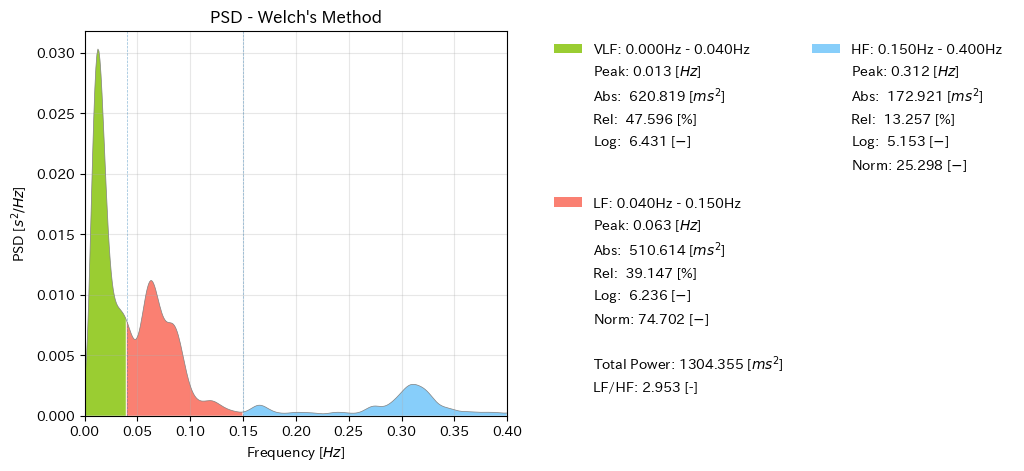

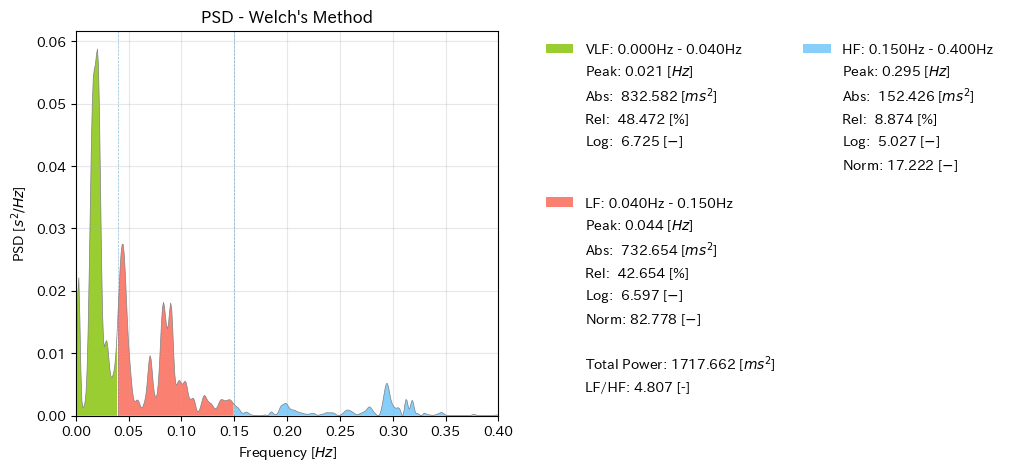

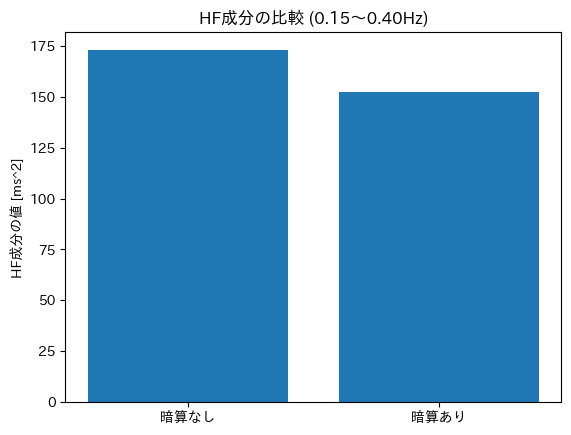

In [6]:
import numpy as np
import pyhrv
import pyhrv.frequency_domain as fd
import matplotlib.pyplot as plt

def compare_hf_integrals(nni1, nni2):
    # Calculate Welch PSD for file1
    result1 = fd.welch_psd(nni=nni1)
    hf1 = result1['fft_abs'][2]

    # Calculate Welch PSD for file2
    result2 = fd.welch_psd(nni=nni2)
    hf2 = result2['fft_abs'][2]

    # Plot side-by-side bar chart
    plt.bar(['暗算なし', '暗算あり'], [hf1, hf2])
    plt.ylabel('HF成分の値 [ms^2]')
    plt.title('HF成分の比較 (0.15〜0.40Hz)')
    plt.show()

compare_hf_integrals(nni1, nni2)
